In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis
---
* Cols and Rows = 4 x 12096
* dtypes = obj(id), int, float
* NaN values = None
* House Quant = 72
* Time = 1 week x House
---
## Remarks
* from graphs, seems like between 72 entites 3 are major companies, approx 6 are small or medium businesses and the rest are people households
* we may consider looking the 'load' columns consumption unité (Watt? kWatt? kWatt/hour? apples? greens?)
* we might define a pseudo final-column adding a threshold beyond which all entites are considered as 'not household'

In [68]:
data = pd.read_csv('/kaggle/input/barevvv/data.csv')
df = data.copy()
df = df.drop('Unnamed: 0', axis=1)
df

,id,wd,hour,load
0,SM20R-01-00000602,1,0,0.048896
1,SM20R-01-00000602,1,1,0.046679
2,SM20R-01-00000602,1,2,0.045662
3,SM20R-01-00000602,1,3,0.046592
4,SM20R-01-00000602,1,4,0.048645
...,...,...,...,...
12091,SM20X-01-00000781,7,19,0.022015
12092,SM20X-01-00000781,7,20,0.021541
12093,SM20X-01-00000781,7,21,0.021593
12094,SM20X-01-00000781,7,22,0.021646


In [69]:
print(df.describe())
print(df.info())
len(df['id'].unique())

                 wd          hour          load
count  12096.000000  12096.000000  12096.000000
mean       4.000000     11.500000      0.014318
std        2.000083      6.922473      0.035255
min        1.000000      0.000000      0.000000
25%        2.000000      5.750000      0.000583
50%        4.000000     11.500000      0.003787
75%        6.000000     17.250000      0.012439
max        7.000000     23.000000      0.631179
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12096 entries, 0 to 12095
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      12096 non-null  object 
 1   wd      12096 non-null  int64  
 2   hour    12096 non-null  int64  
 3   load    12096 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 378.1+ KB
None


72

In [70]:
echelon = df[df['id'] == 'SM20R-01-00000602']
echelon

,id,wd,hour,load
0,SM20R-01-00000602,1,0,0.048896
1,SM20R-01-00000602,1,1,0.046679
2,SM20R-01-00000602,1,2,0.045662
3,SM20R-01-00000602,1,3,0.046592
4,SM20R-01-00000602,1,4,0.048645
...,...,...,...,...
163,SM20R-01-00000602,7,19,0.217280
164,SM20R-01-00000602,7,20,0.181585
165,SM20R-01-00000602,7,21,0.120315
166,SM20R-01-00000602,7,22,0.073219


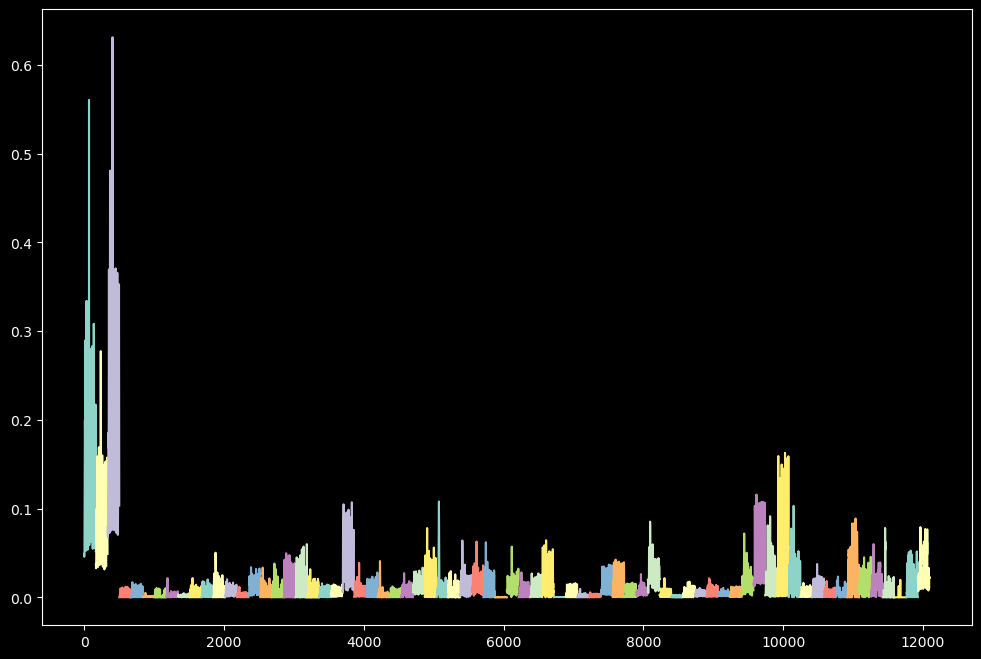

In [71]:
plt.figure(figsize=(12, 8))
plt.title('EDA consumption')
for i in range(0, len(df.loc[:, 'id']), 168):
    plt.plot(df.loc[i:i+167, 'load'])

In [52]:
df['load'] = df.groupby('id')['load'].transform('mean')
df

,id,wd,hour,load
0,SM20R-01-00000602,1,0,0.158904
1,SM20R-01-00000602,1,1,0.158904
2,SM20R-01-00000602,1,2,0.158904
3,SM20R-01-00000602,1,3,0.158904
4,SM20R-01-00000602,1,4,0.158904
...,...,...,...,...
12091,SM20X-01-00000781,7,19,0.028103
12092,SM20X-01-00000781,7,20,0.028103
12093,SM20X-01-00000781,7,21,0.028103
12094,SM20X-01-00000781,7,22,0.028103


In [56]:
df_means = df.groupby('id')['load'].mean().reset_index()
df_means

,id,load
0,SM20R-01-00000602,0.158904
1,SM20R-01-00000623,0.085199
2,SM20R-01-0000063D,0.181609
3,SM20R-01-00000725,0.003365
4,SM20R-01-00000726,0.003163
...,...,...
67,SM20R-02-00000E7E,0.011861
68,SM20X-01-00000728,0.004968
69,SM20X-01-0000074A,0.000482
70,SM20X-01-00000766,0.013180


In [61]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=777777)
model.fit(df_means[['load']])
df_means['load_cluster'] = model.labels_
df_means

,id,load,load_cluster
0,SM20R-01-00000602,0.158904,1
1,SM20R-01-00000623,0.085199,1
2,SM20R-01-0000063D,0.181609,1
3,SM20R-01-00000725,0.003365,0
4,SM20R-01-00000726,0.003163,0
...,...,...,...
67,SM20R-02-00000E7E,0.011861,0
68,SM20X-01-00000728,0.004968,0
69,SM20X-01-0000074A,0.000482,0
70,SM20X-01-00000766,0.013180,0


(array([69.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

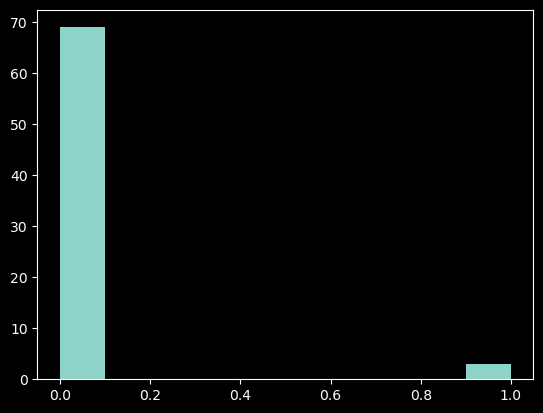

In [62]:
plt.hist(df_means['load_cluster'])